In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc9.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc10.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc1.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/no-caries/nc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/208.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/212.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/215.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/202.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc2.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc45.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc50.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/211.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/caries/wc44.jpg
/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test/carie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
x = []
y = []

image_size = 224

labels = ['caries','without_caries']

for i in labels:
    
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/Trianing',i)

    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)
        
labels = ['caries','no-caries']
for i in labels:
    folderPath = os.path.join('/kaggle/input/tooth-decay-datasetraw/teeth_dataset/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x.append(img)
        if(i=='caries'):
            y.append(1)
        else:
            y.append(0)

x = np.array(x)
y = np.array(y)

In [4]:
len(x)

288

In [5]:
x[0]

array([[[155, 100, 179],
        [153, 100, 175],
        [150,  99, 168],
        ...,
        [219, 180, 212],
        [200, 161, 194],
        [189, 149, 184]],

       [[155,  99, 180],
        [153,  99, 176],
        [150,  98, 169],
        ...,
        [209, 170, 203],
        [207, 167, 201],
        [205, 165, 201]],

       [[148,  94, 176],
        [149,  95, 174],
        [151,  99, 172],
        ...,
        [204, 165, 197],
        [213, 173, 206],
        [218, 179, 212]],

       ...,

       [[141, 156, 170],
        [143, 157, 170],
        [146, 159, 172],
        ...,
        [164, 170, 189],
        [164, 170, 189],
        [164, 170, 189]],

       [[133, 153, 169],
        [135, 154, 169],
        [138, 156, 170],
        ...,
        [168, 173, 192],
        [168, 174, 193],
        [169, 174, 193]],

       [[132, 155, 171],
        [134, 156, 172],
        [136, 157, 174],
        ...,
        [172, 176, 195],
        [172, 177, 196],
        [173, 177, 196]]

In [6]:
y[0]

1

In [7]:
x.shape

(288, 224, 224, 3)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85)

In [41]:
y_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

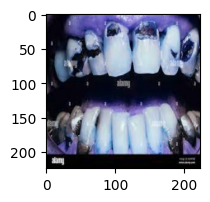

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,2))
plt.imshow(x_train[1])

In [43]:
classes = ['no-cavity','cavity']

In [44]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [45]:
y_train[35]

1

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_ds= train_datagen.flow(
        x_train, y_train, batch_size=32,
)

validation_ds = validation_datagen.flow(
        x_test, y_test, batch_size=32,)

In [48]:
len(train_ds)

8

In [49]:
len(validation_ds)

2

In [50]:
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.applications import DenseNet201

In [51]:
dense_net_201 =  DenseNet201(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
    classifier_activation="sigmoid",
)

model5 = models.Sequential([
    
    ## dense_net_201
    dense_net_201,
    
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model5.compile(optimizer= 'SGD',
           loss='binary_crossentropy',
           metrics=['accuracy'])

In [52]:
history5 = model5.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10


W0000 00:00:1716460191.782646     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.6621 - loss: 0.8863 

W0000 00:00:1716460290.010679     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


8/8 ━━━━━━━━━━━━━━━━━━━━ 241s 15s/step - accuracy: 0.6809 - loss: 0.8490 - val_accuracy: 0.9091 - val_loss: 0.1655
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 429ms/step - accuracy: 0.9523 - loss: 0.0926 - val_accuracy: 0.9091 - val_loss: 0.1218
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.9445 - loss: 0.0928 - val_accuracy: 0.9773 - val_loss: 0.0939
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.9774 - loss: 0.0748 - val_accuracy: 0.9773 - val_loss: 0.0781
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 435ms/step - accuracy: 0.9587 - loss: 0.0796 - val_accuracy: 0.9773 - val_loss: 0.0864
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.9752 - loss: 0.0638 - val_accuracy: 0.9773 - val_loss: 0.0788
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.9872 - loss: 0.0465 - val_accuracy: 0.9773 - val_loss: 0.0734
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.9940 - loss: 0.0333 - val_accuracy: 0.9773 - val_loss: 0.0776
Epo

In [53]:
model5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 94080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │     9,408,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,735,187 (105.80 MB)

 Trainable params: 27,506,129 (104.93 MB)

 Non-trainable params: 229,056 (894.75 KB)

 Optimizer params: 2 (12.00 B)

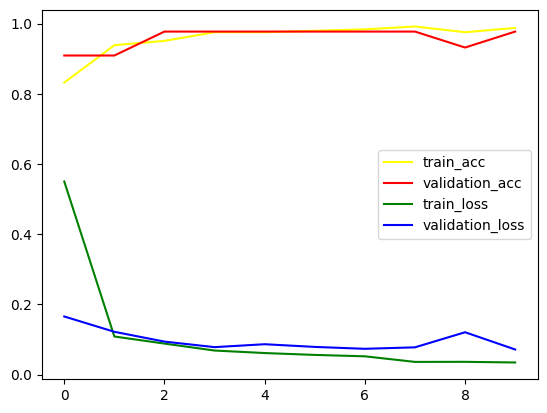

In [54]:
plt.plot(history5.history['accuracy'], color='yellow', label='train_acc')
plt.plot(history5.history['val_accuracy'], color='red', label='validation_acc')
plt.plot(history5.history['loss'], color='green', label='train_loss')
plt.plot(history5.history['val_loss'], color='blue', label='validation_loss')
plt.legend()

In [55]:
def convert_into_categorical(y):
    length=len(y)
    for i in range(length):
        y = y.astype(int)
    return y

In [56]:
y_pred = model5.predict(x_test)
y_pred=convert_into_categorical(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

1/2 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step

W0000 00:00:1716460372.104065     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 35s 18s/step


array([[ 4,  0],
       [40,  0]])

Text(70.72222222222221, 0.5, 'Actual')

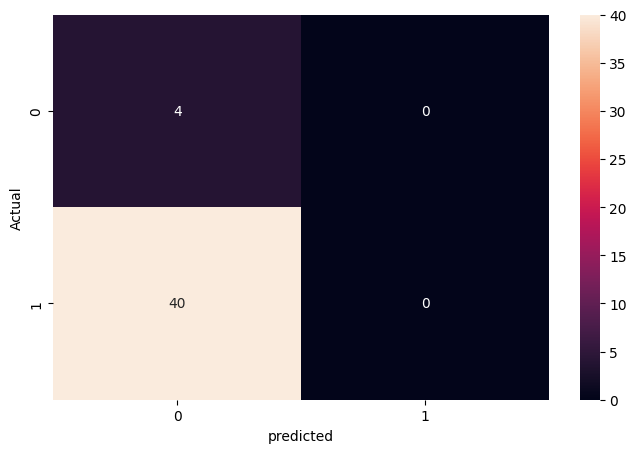

In [57]:
import seaborn as sb
plt.figure(figsize=(8,5))
sb.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Actual')

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      1.00      0.17         4
           1       0.00      0.00      0.00        40

    accuracy                           0.09        44
   macro avg       0.05      0.50      0.08        44
weighted avg       0.01      0.09      0.02        44



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.metrics import roc_curve

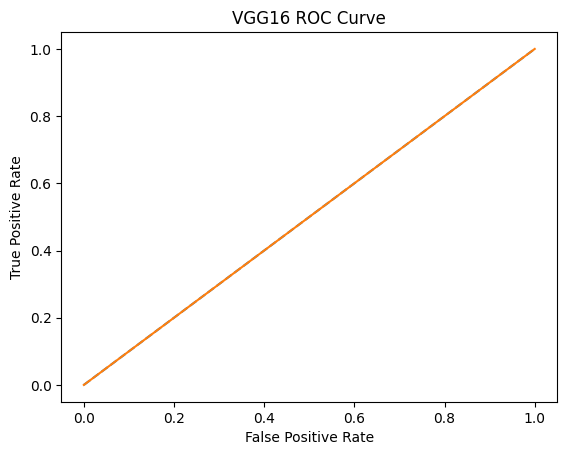

In [61]:
fpr, tpr, thresolds = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('VGG16 ROC Curve')
plt.show()

predicted: no-cavity


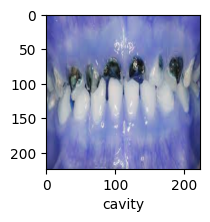

In [69]:
plot_sample(x_test, y_test, 2)
print("predicted:" ,classes[y_pred[2][0]])

In [63]:
model5.evaluate(x_test, y_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.5312 - loss: 1.7525

W0000 00:00:1716460410.080255     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 30s 11s/step - accuracy: 0.4953 - loss: 2.0534


[2.2038304805755615, 0.47727271914482117]